In [1]:
# Import libraries for inspecting files
import json
import numpy as np
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
from PIL import Image
data_location = './data/'

In [2]:
with open('./sceneGraphs/val_sceneGraphs.json') as f:
    data_sg = json.load(f)

In [3]:
image_id = '2363979'
object_id = '760580'
print(data_sg[image_id]['objects'][object_id])
name = data_sg[image_id]['objects'][object_id]['name']
xy = (data_sg[image_id]['objects'][object_id]['x'],data_sg[image_id]['objects'][object_id]['y'])
xy_offset=(xy[0]+8, xy[1]+8)
width = data_sg[image_id]['objects'][object_id]['w']
height = data_sg[image_id]['objects'][object_id]['h']

{'name': 'bed', 'h': 375, 'relations': [], 'w': 500, 'attributes': ['large'], 'y': 0, 'x': 0}


In [4]:
# Gamma correction function ###ZP
# From: https://stackoverflow.com/questions/33322488/how-to-change-image-illumination-in-opencv-python
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([
        ((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)])
    return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))

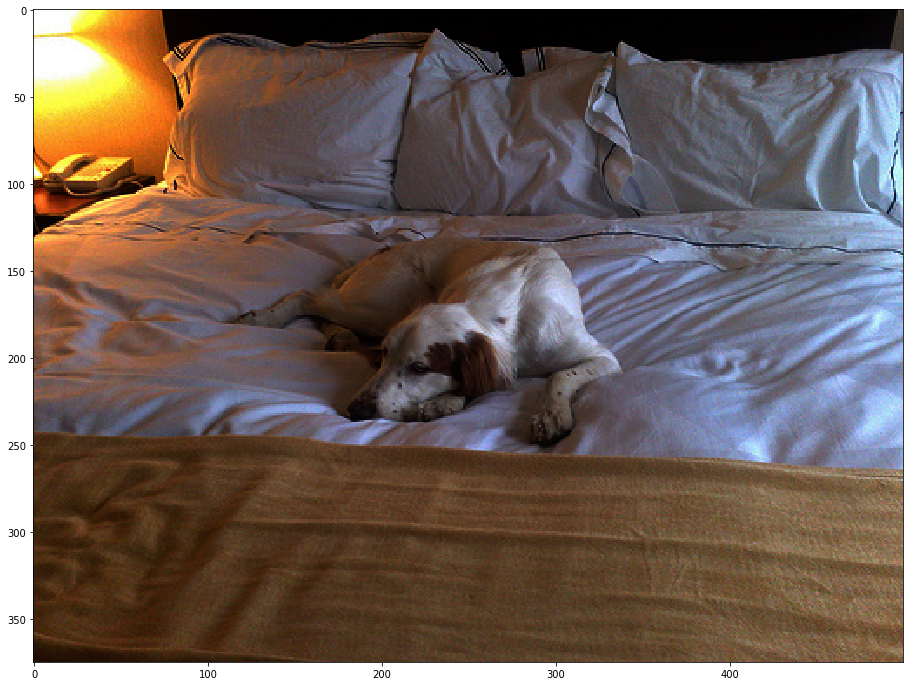

In [9]:
for image_id in ['2363979']: #, '2329177',  '2370909',  '2347765', '2412670']:

    np.random.seed(5)

    plt.figure(figsize=(20,12))
    # Create figure and axes

    img_ex = cv2.imread(data_location + 'images/'+image_id+'.jpg')
    img_ex = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)
    img_ad = adjust_gamma(img_ex, 0.5)
    plt.imshow(img_ad)

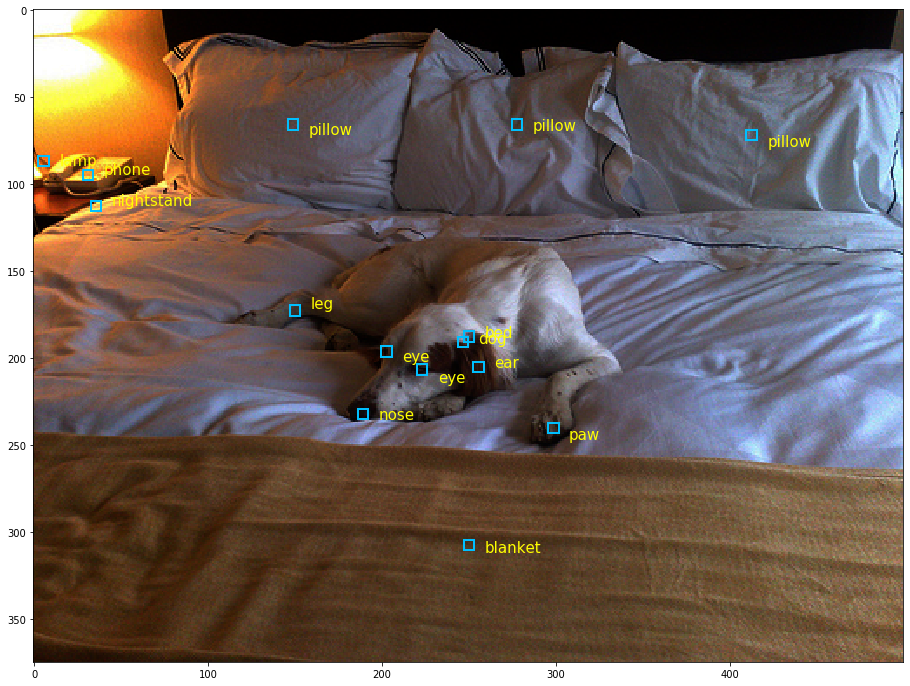

In [11]:
for image_id in ['2363979']: #, '2329177',  '2370909',  '2347765', '2412670']:

    np.random.seed(5)

    plt.figure(figsize=(20,12))
    # Create figure and axes

    img_ex = cv2.imread(data_location + 'images/'+image_id+'.jpg')
    img_ex = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)
    img_ad = adjust_gamma(img_ex, 0.5)
    plt.imshow(img_ad)

    obj_dict={}
    # Build object lookup dictionary
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']
        obj_dict[object_id] = [name, xb,yb,wb, hb]
    #print(obj_dict)

    # Parse objects for image
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']

        node = 6
        x = xb + 0.5*wb 
        y = yb + 0.5*hb 
        h = node
        w = node

        xy = (x,y)


#         # get relations (edges)

#         for relation_id in data_sg[image_id]['objects'][object_id]['relations']:
#             #relation_obj_id = relation_id[object]
#             rel_object_id = relation_id['object']
#             relation_name = relation_id['name']
#             x2 = obj_dict[rel_object_id][1] + 0.5*obj_dict[rel_object_id][3]
#             y2 = obj_dict[rel_object_id][2] + 0.5*obj_dict[rel_object_id][4]
#             xy2 = (x2, y2)
#             #print('#', obj_dict[rel_object_id], x2, y2)

#             xx2 = (xy[0], xy2[0])
#             yy2 = (xy[1],xy2[1])

#             rs1 = 24*np.random.random()-12
#             rs2 = 24*np.random.random()-12
#             rs_h = 24*np.random.random()
#             xy_mean = (np.mean(xx2)+ rs1 - rs_h, np.mean(yy2) + rs2)


#             plt.plot(xx2, yy2, color='plum', linestyle=':')
#             plt.annotate(relation_name,xy_mean,color='pink', size=12)

        xy_d = (x-0.5*node,y-0.5*node)
        rs_v = 10*np.random.random()-5
        xy_offset=(x+12-0.5*node, y+6-0.5*node +rs_v)

        rect = patches.Rectangle(xy_d, w, h,linewidth=2,edgecolor='deepskyblue',facecolor='none')
        plt.gca().add_patch(rect)
        
        attributes = ''

#         # get attributes
#         attributes = ' ('
#         for attrib_id in data_sg[image_id]['objects'][object_id]['attributes']:
#             attributes += attrib_id+' '
#         attributes += ')'

        # render name and attributes
        plt.annotate(name+attributes,xy_offset,color='yellow', size=15)

    plt.show()

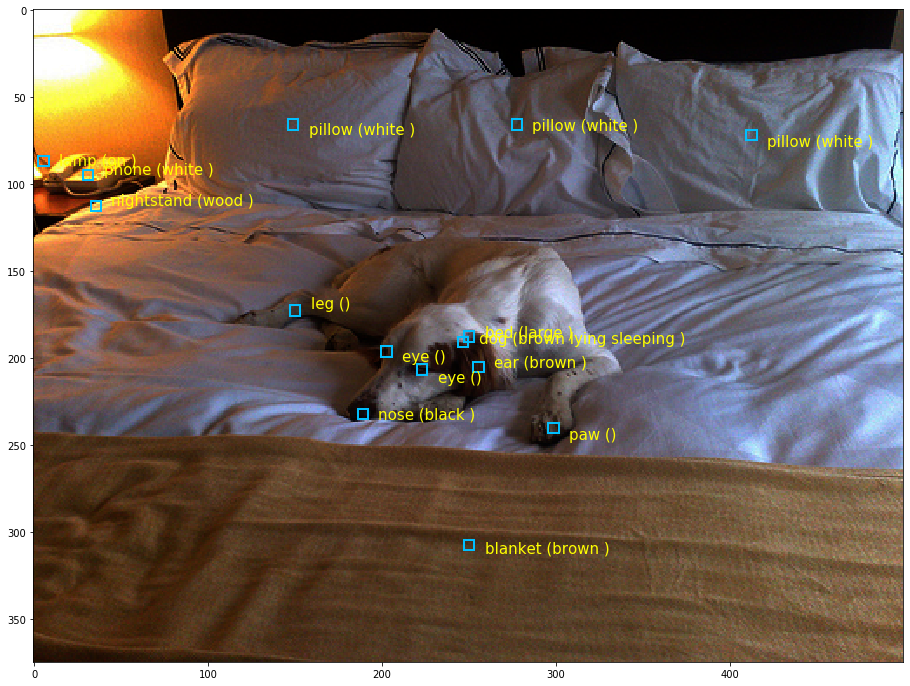

In [12]:
for image_id in ['2363979']: #, '2329177',  '2370909',  '2347765', '2412670']:

    np.random.seed(5)

    plt.figure(figsize=(20,12))
    # Create figure and axes

    img_ex = cv2.imread(data_location + 'images/'+image_id+'.jpg')
    img_ex = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)
    img_ad = adjust_gamma(img_ex, 0.5)
    plt.imshow(img_ad)

    obj_dict={}
    # Build object lookup dictionary
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']
        obj_dict[object_id] = [name, xb,yb,wb, hb]
    #print(obj_dict)

    # Parse objects for image
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']

        node = 6
        x = xb + 0.5*wb 
        y = yb + 0.5*hb 
        h = node
        w = node

        xy = (x,y)


#         # get relations (edges)

#         for relation_id in data_sg[image_id]['objects'][object_id]['relations']:
#             #relation_obj_id = relation_id[object]
#             rel_object_id = relation_id['object']
#             relation_name = relation_id['name']
#             x2 = obj_dict[rel_object_id][1] + 0.5*obj_dict[rel_object_id][3]
#             y2 = obj_dict[rel_object_id][2] + 0.5*obj_dict[rel_object_id][4]
#             xy2 = (x2, y2)
#             #print('#', obj_dict[rel_object_id], x2, y2)

#             xx2 = (xy[0], xy2[0])
#             yy2 = (xy[1],xy2[1])

#             rs1 = 24*np.random.random()-12
#             rs2 = 24*np.random.random()-12
#             rs_h = 24*np.random.random()
#             xy_mean = (np.mean(xx2)+ rs1 - rs_h, np.mean(yy2) + rs2)


#             plt.plot(xx2, yy2, color='plum', linestyle=':')
#             plt.annotate(relation_name,xy_mean,color='pink', size=12)

        xy_d = (x-0.5*node,y-0.5*node)
        rs_v = 10*np.random.random()-5
        xy_offset=(x+12-0.5*node, y+6-0.5*node +rs_v)

        rect = patches.Rectangle(xy_d, w, h,linewidth=2,edgecolor='deepskyblue',facecolor='none')
        plt.gca().add_patch(rect)
        

        # get attributes
        attributes = ' ('
        for attrib_id in data_sg[image_id]['objects'][object_id]['attributes']:
            attributes += attrib_id+' '
        attributes += ')'

        # render name and attributes
        plt.annotate(name+attributes,xy_offset,color='yellow', size=15)

    plt.show()

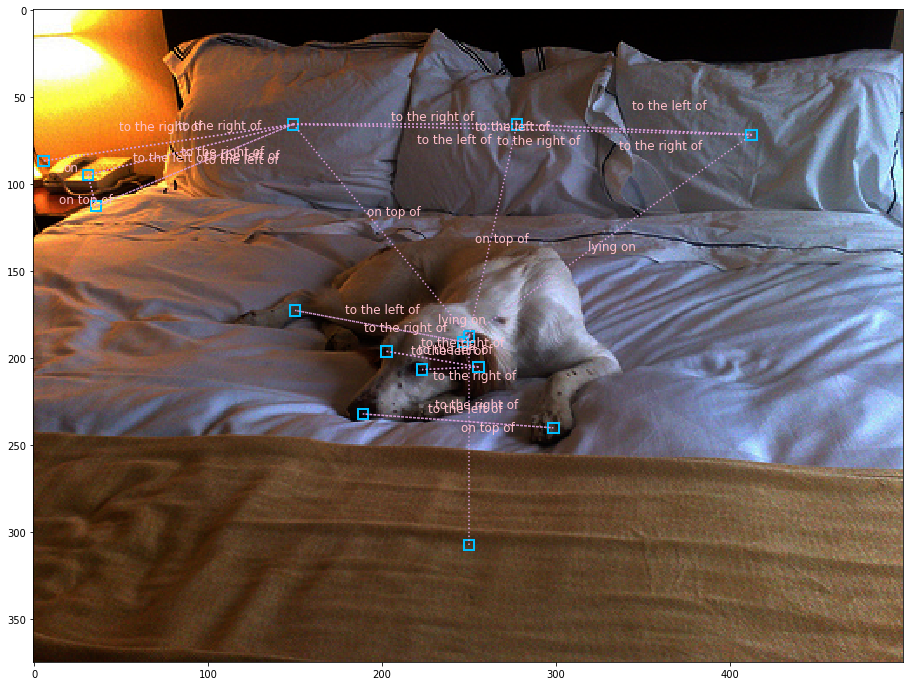

In [15]:
for image_id in ['2363979']: #, '2329177',  '2370909',  '2347765', '2412670']:

    np.random.seed(5)

    plt.figure(figsize=(20,12))
    # Create figure and axes

    img_ex = cv2.imread(data_location + 'images/'+image_id+'.jpg')
    img_ex = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)
    img_ad = adjust_gamma(img_ex, 0.5)
    plt.imshow(img_ad)

    obj_dict={}
    # Build object lookup dictionary
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']
        obj_dict[object_id] = [name, xb,yb,wb, hb]
    #print(obj_dict)

    # Parse objects for image
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']

        node = 6
        x = xb + 0.5*wb 
        y = yb + 0.5*hb 
        h = node
        w = node

        xy = (x,y)


        # get relations (edges)

        for relation_id in data_sg[image_id]['objects'][object_id]['relations']:
            #relation_obj_id = relation_id[object]
            rel_object_id = relation_id['object']
            relation_name = relation_id['name']
            x2 = obj_dict[rel_object_id][1] + 0.5*obj_dict[rel_object_id][3]
            y2 = obj_dict[rel_object_id][2] + 0.5*obj_dict[rel_object_id][4]
            xy2 = (x2, y2)
            #print('#', obj_dict[rel_object_id], x2, y2)

            xx2 = (xy[0], xy2[0])
            yy2 = (xy[1],xy2[1])

            rs1 = 24*np.random.random()-12
            rs2 = 24*np.random.random()-12
            rs_h = 24*np.random.random()
            xy_mean = (np.mean(xx2)+ rs1 - rs_h, np.mean(yy2) + rs2)


            plt.plot(xx2, yy2, color='plum', linestyle=':')
            plt.annotate(relation_name,xy_mean,color='pink', size=12)

        xy_d = (x-0.5*node,y-0.5*node)
        rs_v = 10*np.random.random()-5
        xy_offset=(x+12-0.5*node, y+6-0.5*node +rs_v)

        rect = patches.Rectangle(xy_d, w, h,linewidth=2,edgecolor='deepskyblue',facecolor='none')
        plt.gca().add_patch(rect)
        

#         # get attributes
#         attributes = ' ('
#         for attrib_id in data_sg[image_id]['objects'][object_id]['attributes']:
#             attributes += attrib_id+' '
#         attributes += ')'

#         # render name and attributes
#         plt.annotate(name+attributes,xy_offset,color='yellow', size=15)

    plt.show()

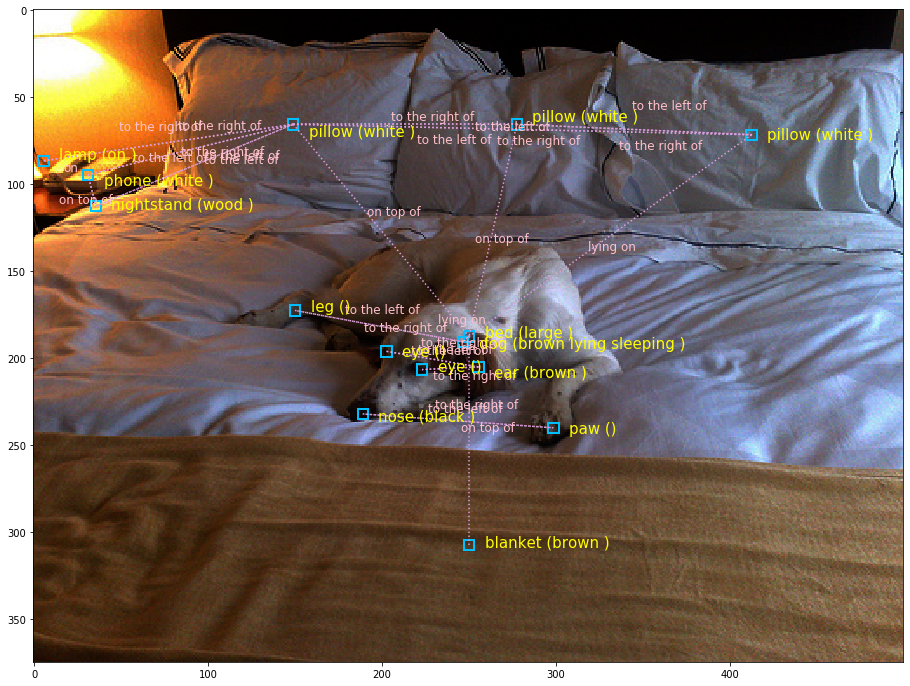

In [13]:
for image_id in ['2363979']: #, '2329177',  '2370909',  '2347765', '2412670']:

    np.random.seed(5)

    plt.figure(figsize=(20,12))
    # Create figure and axes

    img_ex = cv2.imread(data_location + 'images/'+image_id+'.jpg')
    img_ex = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)
    img_ad = adjust_gamma(img_ex, 0.5)
    plt.imshow(img_ad)

    obj_dict={}
    # Build object lookup dictionary
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']
        obj_dict[object_id] = [name, xb,yb,wb, hb]
    #print(obj_dict)

    # Parse objects for image
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']

        node = 6
        x = xb + 0.5*wb 
        y = yb + 0.5*hb 
        h = node
        w = node

        xy = (x,y)


        # get relations (edges)

        for relation_id in data_sg[image_id]['objects'][object_id]['relations']:
            #relation_obj_id = relation_id[object]
            rel_object_id = relation_id['object']
            relation_name = relation_id['name']
            x2 = obj_dict[rel_object_id][1] + 0.5*obj_dict[rel_object_id][3]
            y2 = obj_dict[rel_object_id][2] + 0.5*obj_dict[rel_object_id][4]
            xy2 = (x2, y2)
            #print('#', obj_dict[rel_object_id], x2, y2)

            xx2 = (xy[0], xy2[0])
            yy2 = (xy[1],xy2[1])

            rs1 = 24*np.random.random()-12
            rs2 = 24*np.random.random()-12
            rs_h = 24*np.random.random()
            xy_mean = (np.mean(xx2)+ rs1 - rs_h, np.mean(yy2) + rs2)


            plt.plot(xx2, yy2, color='plum', linestyle=':')
            plt.annotate(relation_name,xy_mean,color='pink', size=12)

        xy_d = (x-0.5*node,y-0.5*node)
        rs_v = 10*np.random.random()-5
        xy_offset=(x+12-0.5*node, y+6-0.5*node +rs_v)

        rect = patches.Rectangle(xy_d, w, h,linewidth=2,edgecolor='deepskyblue',facecolor='none')
        plt.gca().add_patch(rect)
        

        # get attributes
        attributes = ' ('
        for attrib_id in data_sg[image_id]['objects'][object_id]['attributes']:
            attributes += attrib_id+' '
        attributes += ')'

        # render name and attributes
        plt.annotate(name+attributes,xy_offset,color='yellow', size=15)

    plt.show()

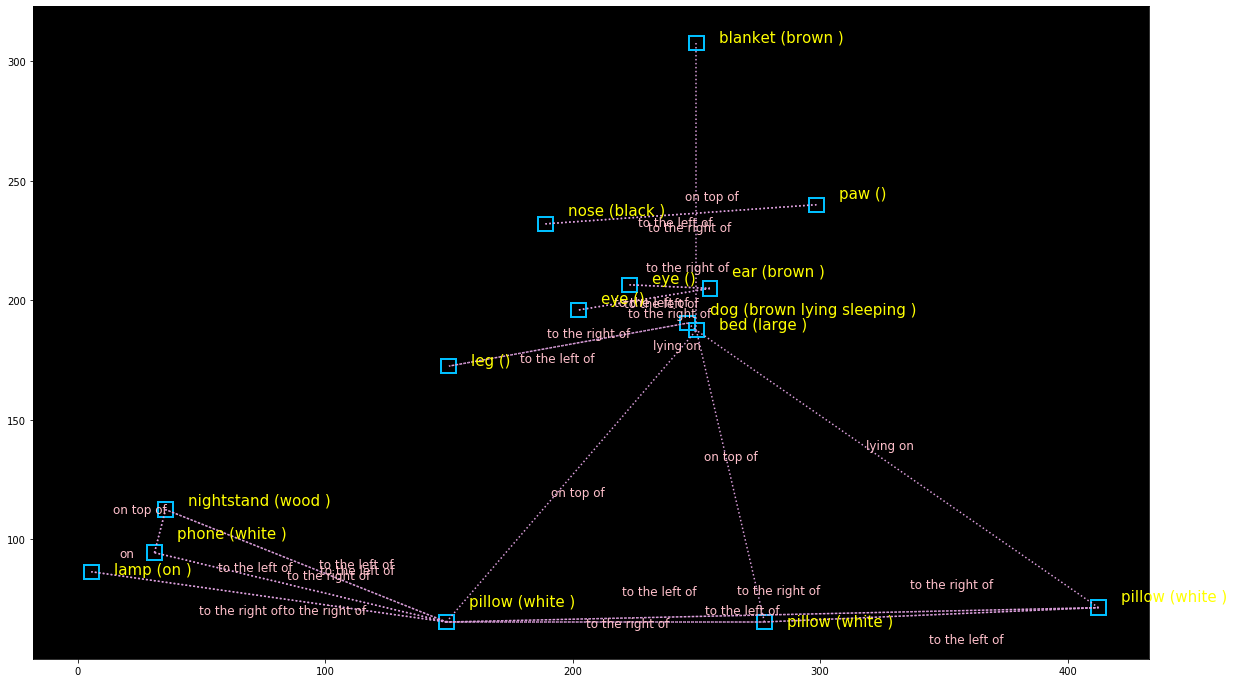

In [22]:
for image_id in ['2363979']: #, '2329177',  '2370909',  '2347765', '2412670']:

    np.random.seed(5)

    plt.figure(figsize=(20,12))
    plt.gca().set_facecolor((0, 0, 0))
    
    # Create figure and axes

    img_ex = cv2.imread(data_location + 'images/'+image_id+'.jpg')
    img_ex = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)
    #img_ad = adjust_gamma(img_ex, 0.01)
    #plt.imshow(img_ad)

    obj_dict={}
    # Build object lookup dictionary
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']
        obj_dict[object_id] = [name, xb,yb,wb, hb]
    #print(obj_dict)

    # Parse objects for image
    for object_id in data_sg[image_id]['objects']:
        name = data_sg[image_id]['objects'][object_id]['name']
        xb = data_sg[image_id]['objects'][object_id]['x']
        yb = data_sg[image_id]['objects'][object_id]['y']
        hb = data_sg[image_id]['objects'][object_id]['h']
        wb = data_sg[image_id]['objects'][object_id]['w']

        node = 6
        x = xb + 0.5*wb 
        y = yb + 0.5*hb 
        h = node
        w = node

        xy = (x,y)


        # get relations (edges)

        for relation_id in data_sg[image_id]['objects'][object_id]['relations']:
            #relation_obj_id = relation_id[object]
            rel_object_id = relation_id['object']
            relation_name = relation_id['name']
            x2 = obj_dict[rel_object_id][1] + 0.5*obj_dict[rel_object_id][3]
            y2 = obj_dict[rel_object_id][2] + 0.5*obj_dict[rel_object_id][4]
            xy2 = (x2, y2)
            #print('#', obj_dict[rel_object_id], x2, y2)

            xx2 = (xy[0], xy2[0])
            yy2 = (xy[1],xy2[1])

            rs1 = 24*np.random.random()-12
            rs2 = 24*np.random.random()-12
            rs_h = 24*np.random.random()
            xy_mean = (np.mean(xx2)+ rs1 - rs_h, np.mean(yy2) + rs2)


            plt.plot(xx2, yy2, color='plum', linestyle=':')
            plt.annotate(relation_name,xy_mean,color='pink', size=12)

        xy_d = (x-0.5*node,y-0.5*node)
        rs_v = 10*np.random.random()-5
        xy_offset=(x+12-0.5*node, y+6-0.5*node +rs_v)

        rect = patches.Rectangle(xy_d, w, h,linewidth=2,edgecolor='deepskyblue',facecolor='none')
        plt.gca().add_patch(rect)
        

        # get attributes
        attributes = ' ('
        for attrib_id in data_sg[image_id]['objects'][object_id]['attributes']:
            attributes += attrib_id+' '
        attributes += ')'

        # render name and attributes
        plt.annotate(name+attributes,xy_offset,color='yellow', size=15)

    plt.show()